In [60]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
import numpy

def read_log(np, base):
    fn = '%s.%d' % (base, np)
    
    lines = []
    for line in open(fn).readlines():
        if line[0] != '[': continue
        lines.append(line.split()[1])
        
    t = numpy.loadtxt(lines)
    print (fn, t.shape)
    return t
nps = [1, 2, 4, 8, 16, 32, 64, 128, 256]
conv = numpy.vstack(read_log(np, base='./convpower-bench') for np in nps).T


./convpower-bench.1 (37,)
./convpower-bench.2 (37,)
./convpower-bench.4 (37,)
./convpower-bench.8 (37,)
./convpower-bench.16 (37,)
./convpower-bench.32 (37,)
./convpower-bench.64 (37,)
./convpower-bench.128 (37,)
./convpower-bench.256 (37,)


In [62]:
conv.shape

(37, 9)

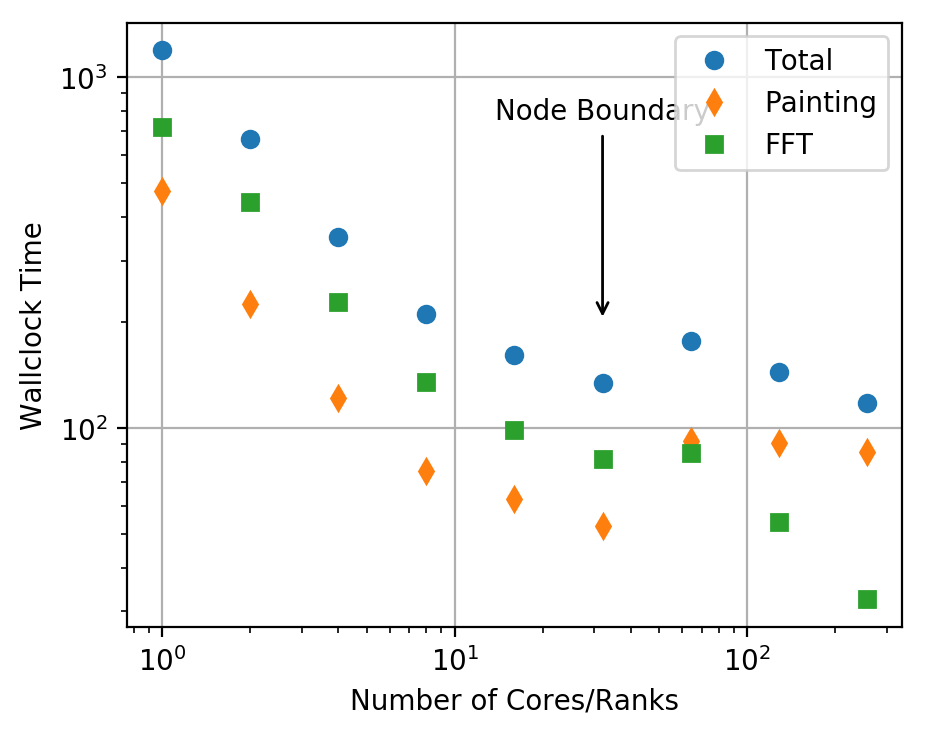

In [63]:
figure(figsize=(5, 4), dpi=200)
plot(nps, conv[-1], 'o', label='Total')
plot(nps, conv[24], 'd', label='Painting')
plot(nps, conv[-1] - conv[24], 's', label='FFT')
grid()
annotate("Node Boundary", xy=(32., 200.), xytext=(32., 800.),
    arrowprops=dict(arrowstyle="->"), ha='center', va='center')
loglog()
legend()
xlabel('Number of Cores/Ranks')
ylabel('Wallclock Time')
savefig("convpower-scaling.pdf")

In [64]:
nps_emu = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
emu = numpy.vstack(read_log(np, base='./emu-bench') for np in nps_emu).T


./emu-bench.2 (15,)
./emu-bench.4 (15,)
./emu-bench.8 (15,)
./emu-bench.16 (15,)
./emu-bench.32 (15,)
./emu-bench.64 (15,)
./emu-bench.128 (15,)
./emu-bench.256 (15,)
./emu-bench.512 (15,)
./emu-bench.1024 (15,)


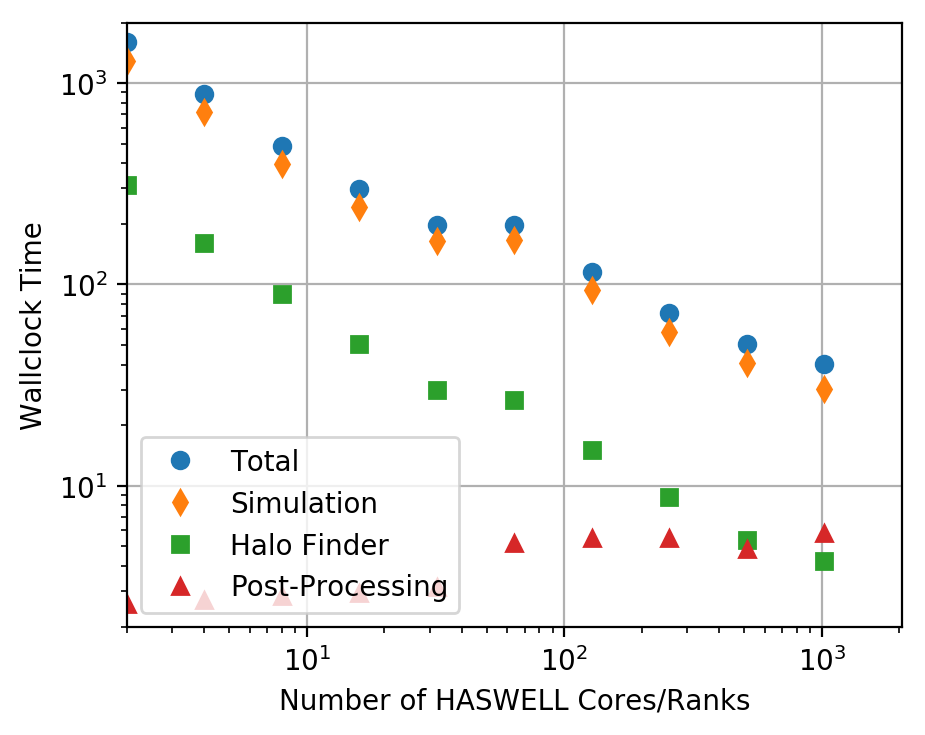

In [71]:
figure(figsize=(5, 4), dpi=200)
plot(nps_emu, emu[-1], 'o', label='Total')
plot(nps_emu, emu[0], 'd', label='Simulation')
plot(nps_emu, emu[3] - emu[0], 's', label='Halo Finder')
plot(nps_emu, emu[-1] - emu[3], '^', label='Post-Processing')
grid()
#annotate("Node Boundary", xy=(32., 200.), xytext=(32., 800.),
#    arrowprops=dict(arrowstyle="->"), ha='center', va='center')
loglog()
legend(loc='lower left')
xlabel('Number of HASWELL Cores/Ranks')
ylabel('Wallclock Time')
xlim(2, 2048)
ylim(2, 2000)
savefig("emu-scaling.pdf")

In [66]:
nps_emu_knl = [16, 32, 64, 128, 256, 512, 1024]
emu_knl = numpy.vstack(read_log(np, base='./emu-bench-knl') for np in nps_emu_knl).T


./emu-bench-knl.16 (14,)
./emu-bench-knl.32 (14,)
./emu-bench-knl.64 (14,)
./emu-bench-knl.128 (14,)
./emu-bench-knl.256 (14,)
./emu-bench-knl.512 (14,)
./emu-bench-knl.1024 (14,)


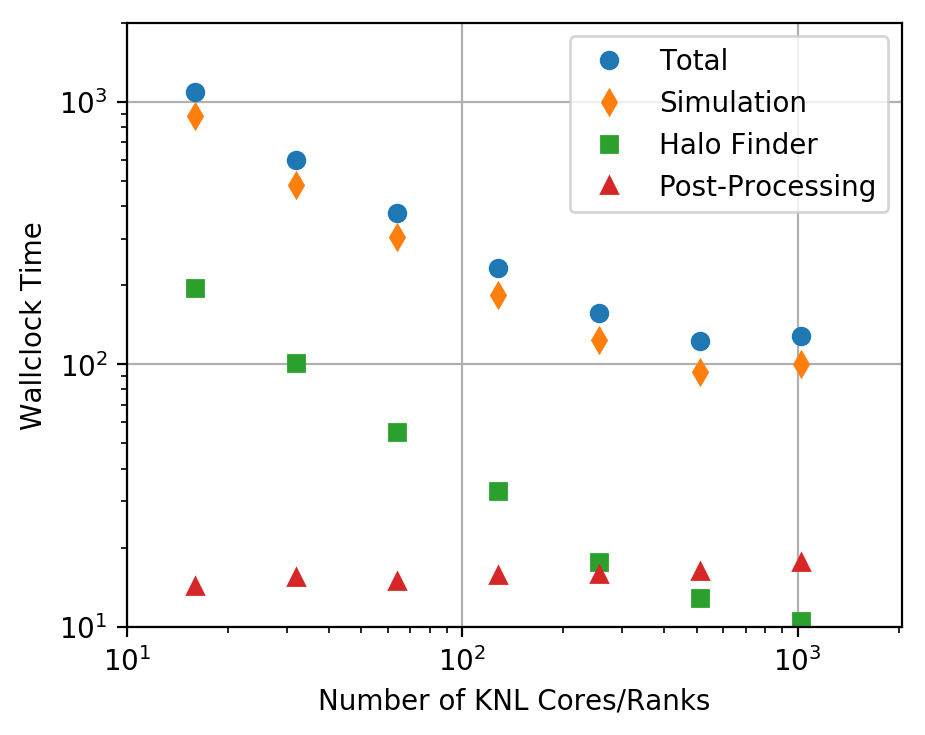

In [98]:
figure(figsize=(5, 4), dpi=200)
plot(nps_emu_knl, emu_knl[-1], 'o', label='Total')
plot(nps_emu_knl, emu_knl[0], 'd', label='Simulation')
plot(nps_emu_knl, emu_knl[2] - emu_knl[0], 's', label='Halo Finder')
plot(nps_emu_knl, emu_knl[-1] - emu_knl[2], '^', label='Post-Processing')
grid()
#annotate("Node Boundary", xy=(32., 200.), xytext=(32., 800.),
#    arrowprops=dict(arrowstyle="->"), ha='center', va='center')
loglog()
legend(loc='upper right')
xlabel('Number of KNL Cores/Ranks')
ylabel('Wallclock Time')
xlim(10, 2048)
ylim(10, 2000)
savefig("figure-1-emu-knl-scaling.pdf")


In [68]:
nps_emu_knl2 = [256, 512, 1024]
emu_knl2 = numpy.vstack(read_log(np, base='./emu-bench-knl-2') for np in nps_emu_knl2).T
emu_knl2_ref = numpy.vstack(read_log(np, base='./emu-bench-knl') for np in nps_emu_knl2).T


./emu-bench-knl-2.256 (14,)
./emu-bench-knl-2.512 (14,)
./emu-bench-knl-2.1024 (14,)
./emu-bench-knl.256 (14,)
./emu-bench-knl.512 (14,)
./emu-bench-knl.1024 (14,)


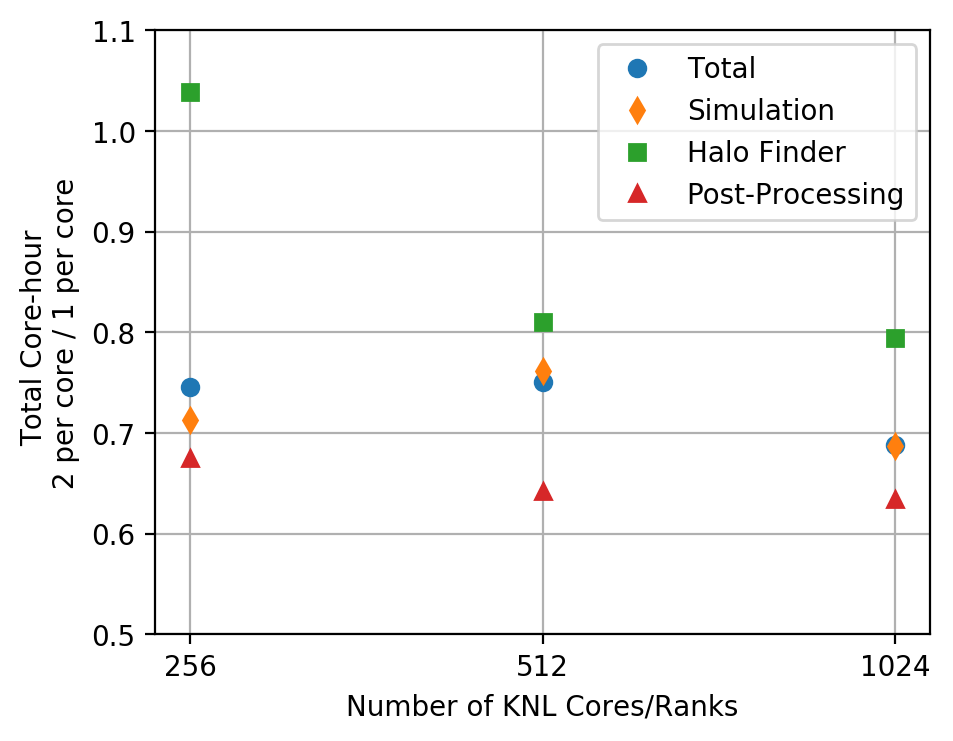

In [99]:
figure(figsize=(5, 4), dpi=200)
plot(nps_emu_knl2, 0.5 * emu_knl2[-1] / emu_knl2_ref[-1], 'o', label='Total')
plot(nps_emu_knl2, 0.5 * emu_knl2[0]/ emu_knl2_ref[0], 'd', label='Simulation')
plot(nps_emu_knl2, 0.5 * (emu_knl2[2] - emu_knl2[0])/(emu_knl2_ref[2] - emu_knl2_ref[0]), 's', label='Halo Finder')
plot(nps_emu_knl2, 0.5 * (emu_knl2[-1] - emu_knl2[2])/(emu_knl2_ref[-1] - emu_knl2_ref[2]), '^', label='Post-Processing')

#annotate("Node Boundary", xy=(32., 200.), xytext=(32., 800.),
#    arrowprops=dict(arrowstyle="->"), ha='center', va='center')
xscale('log')

legend(loc='upper right')
xlabel('Number of KNL Cores/Ranks')
ylabel('Total Core-hour \n 2 per core / 1 per core ')
#xlim(2, 2048)
ylim(0.5, 1.1)
tick_params(axis='x', which='minor', tick1On=False, label1On=False)
xticks([256, 512, 1024], ['256', '512', '1024'])
grid()
savefig("figure-2-emu-knl-2-or-1-ranks-per-core.pdf")
